In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
from sklearn import metrics

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression

In [2]:
bank=pd.read_csv('C:\\Users\\hp\\Desktop\\analytixlabs\\logistic regg\\1. Case Study - Bank Loans\\bankloans.csv')

In [3]:
bank.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [5]:
nbank= bank.select_dtypes(['int64','float64'])

In [6]:
nbank

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [7]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [8]:
nbank.apply(lambda x:continuous_var_summary(x))

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
N,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
NMISS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000
SUM,29775.000000,1454.000000,7281.000000,7116.000000,39674.000000,8645.900000,1340.284021,2616.970979,183.000000
MEAN,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
MEDIAN,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
STD,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
VAR,64.664623,0.860783,45.939706,47.541251,1485.566998,45.150891,4.519196,11.551864,0.193360
MIN,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
P1,21.000000,1.000000,0.000000,0.000000,14.490000,0.900000,0.030349,0.162394,0.000000
P5,23.000000,1.000000,0.000000,0.000000,17.000000,1.900000,0.108927,0.359900,0.000000


In [10]:
nbank_exist=nbank[nbank.default.isnull()==0]

In [12]:
nbank_new=nbank[nbank.default.isnull()==1]

In [13]:
nbank_exist=nbank_exist.apply(lambda x :x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99)))

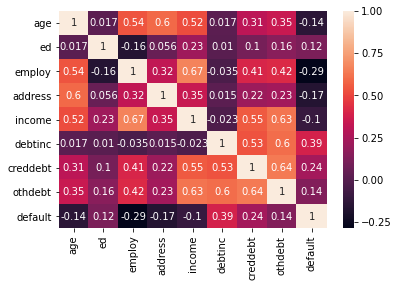

In [16]:
sns.heatmap(nbank_exist.corr(),annot=True)

In [68]:
a=pd.DataFrame()
for x_var in nbank_exist.columns.difference(['default']):
    logreg=smf.logit('default ~' + x_var,data=nbank_exist).fit()
    y_score=pd.Series(logreg.predict())
    somersd= 2*metrics.roc_auc_score(nbank_exist.default,y_score)-1
    somerdtab=pd.DataFrame([x_var,somersd]).T
    a=pd.concat([a,somerdtab],axis=0)
    

Optimization terminated successfully.
         Current function value: 0.559856
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564673
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548956
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.501389
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567774
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.527166
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569055
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565619
         Iterations 5


In [71]:
nbank_exist.drop(columns=['ed','othdebt'],inplace=True)

In [75]:
feature='+'.join(nbank_exist.columns.difference(['default']))

In [76]:
a,b=dmatrices('default ~'+ feature,data=nbank_exist,return_type='dataframe')

In [77]:
vif=pd.DataFrame()
vif['vif']= [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns
vif

,vif,features
0,28.286222,Intercept
1,1.559236,address
2,2.036933,age
3,2.564921,creddebt
4,1.778339,debtinc
5,1.997947,employ
6,2.601717,income


In [78]:
feature

'address+age+creddebt+debtinc+employ+income'

In [141]:
train, test = train_test_split(nbank_exist, test_size = 0.3, random_state =  42)

In [142]:
lgm=smf.logit('default ~ address+creddebt+debtinc+employ',data=train).fit()

Optimization terminated successfully.
         Current function value: 0.430926
         Iterations 7


In [143]:
print(lgm.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.265     
Dependent Variable: default          AIC:              432.3076  
Date:               2020-05-21 14:01 BIC:              453.2797  
No. Observations:   490              Log-Likelihood:   -211.15   
Df Model:           4                LL-Null:          -287.47   
Df Residuals:       485              LLR p-value:      5.5384e-32
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.7817    0.2904  -2.6918  0.0071  -1.3510  -0.2125
address       -0.0577    0.0213  -2.7026  0.0069  -0.0995  -0.0158
creddebt       0.6007    0.1030   5.8339  0.0000   0.3989   0.8025
debtinc        0.0714    0.021

In [144]:
train['pred']= lgm.predict(train)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
test['pred']=lgm.predict(test)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
train_auc = metrics.roc_auc_score(train.default, train.pred)
test_auc = metrics.roc_auc_score(test.default, test.pred)

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.8368690256582257
The AUC for the model built on the Test Data is :  0.8859170997591583


In [150]:
bestcf=pd.DataFrame()
train1=train.copy()
for cutoff in np.linspace(0,1,100):
    train1['cutoff']=cutoff
    train1['predicted']=train1.pred.apply(lambda x :0.0 if x<cutoff else 1.0)
    train1['tp']=np.where((train1.default==1)&(train1.predicted==1),1,0)
    train1['tn']=np.where((train1.default==0)&(train1.predicted==0),1,0)
    train1['fp']=np.where((train1.default==0)&(train1.predicted==1),1,0)
    train1['fn']=np.where((train1.default==1)&(train1.predicted==0),1,0)
    sensitivity = train1['tp'].sum() / (train1['tp'].sum() + train1['fn'].sum())
    specificity = train1['tn'].sum() / (train1['tn'].sum() + train1['fp'].sum())
    accuracy = (train1['tp'].sum()  + train1['tn'].sum() ) / (train1['tp'].sum() + train1['fn'].sum() + train1['tn'].sum() + train1['fp'].sum())
    bestcf_table = pd.DataFrame([cutoff, sensitivity, specificity, accuracy]).T
    bestcf_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    bestcf = pd.concat([bestcf, bestcf_table], axis=0) 
bestcf['total'] = bestcf['sensitivity'] + bestcf['specificity']


In [152]:
bestcf[bestcf.total==bestcf.total.max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.232323,0.850746,0.685393,0.730612,1.53614


In [154]:
test['predicted'] = test['pred'].apply(lambda x: 1 if x > 0.23 else 0)
train['predicted'] = train['pred'].apply(lambda x: 1 if x > 0.23 else 0)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [156]:
pd.crosstab(train['default'], train['predicted'])

predicted,0,1
default,,
0.0,242,114
1.0,19,115


In [157]:
pd.crosstab(test['default'], test['predicted'])

predicted,0,1
default,,
0.0,116,45
1.0,8,41


In [160]:
print('acc for test:',metrics.accuracy_score(test.default, test.predicted))
print('acc for train:',metrics.accuracy_score(train.default, train.predicted))

acc for test: 0.7476190476190476
acc for train: 0.7285714285714285


In [163]:
nbank_new['pred']=lgm.predict(nbank_new)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [170]:
nbank_new['default']=nbank_new['pred'].apply(lambda x:1 if x>0.23 else 0)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [171]:
nbank_new['default'].value_counts()

0    86
1    64
Name: default, dtype: int64